In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/test/titanic.csv')

In [ ]:
1. 승선했던 승객은 누구인가?
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


4. 생존자 확인

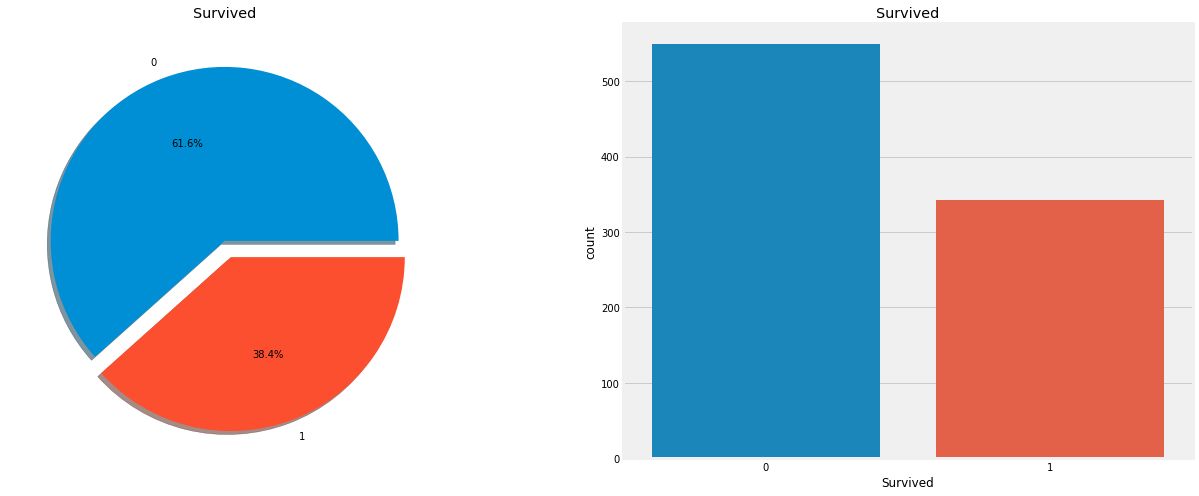

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,8))
titanic['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('Survived',data=titanic,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

성별로 생존자 확인

In [ ]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<function matplotlib.pyplot.show>

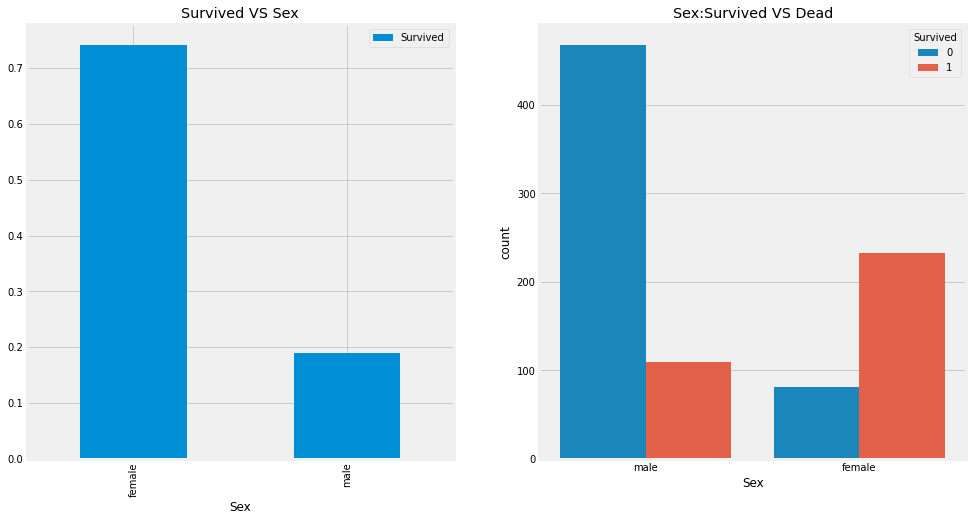

In [ ]:
f,ax = plt.subplots(1,2,figsize=(15,8))
titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('Sex',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Sex:Survived VS Dead')
plt.show

객실 별 생존자

Text(0.5, 1.0, 'Pclass:Survived vs Dead')

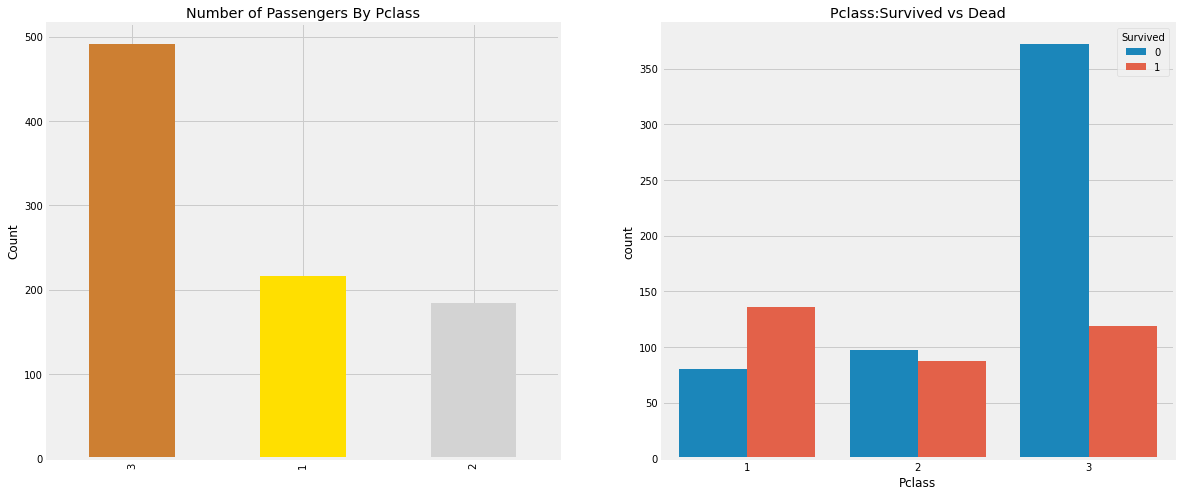

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

성별에다른 객실별 생존율


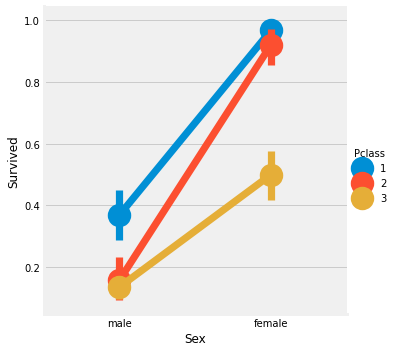

In [ ]:
sns.factorplot('Sex', 'Survived', hue = 'Pclass', data= titanic)
plt.show()

탑승지 별 데이터 (C 프랑스 쉘부르, Q 아일랜드 퀸즈타운, S 영국 사우샘프턴)


탑승지역별 인원

In [ ]:
titanic.groupby(['Embarked'])['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

탑승지역 별 객실인원

In [ ]:
titanic.groupby(['Embarked','Pclass'])['Pclass'].count()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Pclass, dtype: int64

탑승 지역별 생존인원

Text(0.5, 1.0, 'Embarked:Survived vs Dead')

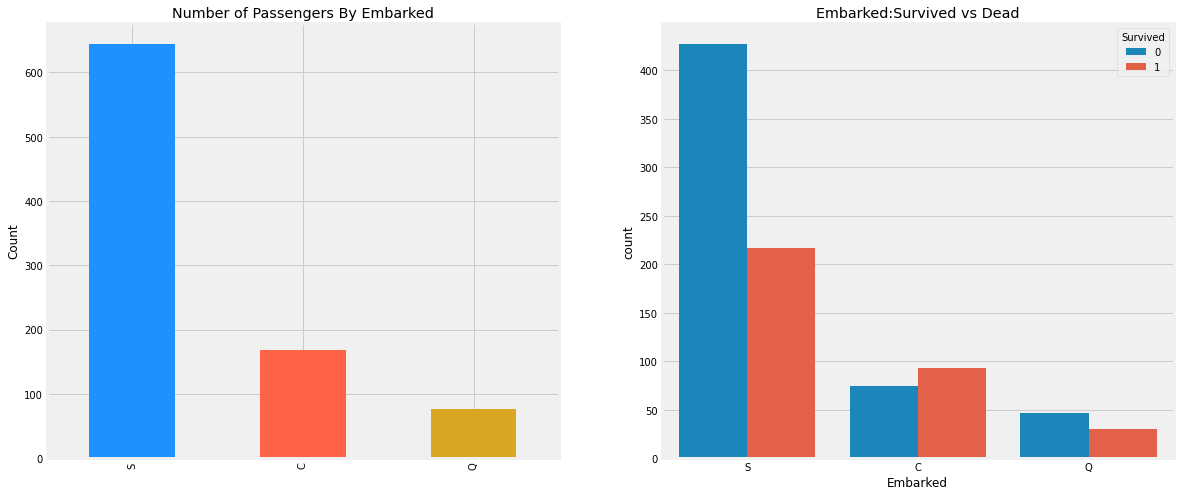

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
titanic['Embarked'].value_counts().plot.bar(color=['#1E90FF','#FF6347','#DAA520'],ax=ax[0])
ax[0].set_title('Number of Passengers By Embarked')
ax[0].set_ylabel('Count')
sns.countplot('Embarked',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')

성별에따른 탑승지별 생존율

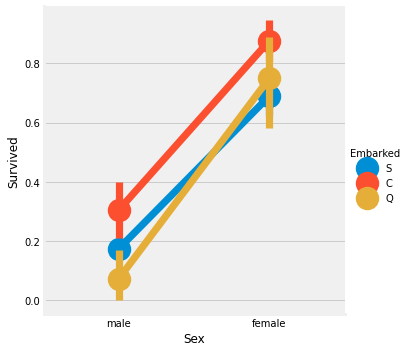

In [ ]:
sns.factorplot('Sex', 'Survived', hue = 'Embarked', data= titanic)
plt.show()